<a href="https://colab.research.google.com/github/ketanp23/sit-neuralnetworks-class/blob/main/Exponential_Decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Insight: Smooth decay helps stabilize training, especially for deep networks.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8639 - loss: 0.4710 - val_accuracy: 0.9496 - val_loss: 0.1748
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9555 - loss: 0.1599 - val_accuracy: 0.9611 - val_loss: 0.1300
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9655 - loss: 0.1172 - val_accuracy: 0.9688 - val_loss: 0.1087
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9738 - loss: 0.0929 - val_accuracy: 0.9717 - val_loss: 0.0972
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9782 - loss: 0.0793 - val_accuracy: 0.9732 - val_loss: 0.0916
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9804 - loss: 0.0697 - val_accuracy: 0.9749 - val_loss: 0.0875
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0644 - val_accuracy: 0.9740 - val_loss: 0.0853
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9833 - loss: 0.0599 - 

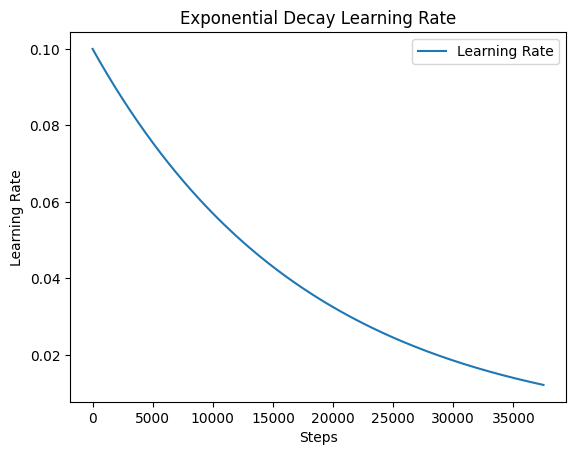

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()
X_train, X_val = X_train / 255.0, X_val / 255.0

# Build model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Exponential decay
initial_lr = 0.1
decay_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_lr, decay_steps=1000, decay_rate=0.9, staircase=False)

# Compile with scheduler
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and plot
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val),
                    batch_size=32)

# Plot learning rate (approximate)
steps = len(X_train) // 32  # Steps per epoch
lrs = [initial_lr * (0.9 ** (i / steps)) for i in range(steps * 20)]
plt.plot(lrs, label='Learning Rate')
plt.xlabel('Steps')
plt.ylabel('Learning Rate')
plt.title('Exponential Decay Learning Rate')
plt.legend()
plt.show()